<a href="https://colab.research.google.com/github/YehezkelShay/hello-world/blob/master/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [0]:
import numpy as np #Arrays and matricies
import pandas as pd #Dataframes
from sklearn import datasets
import matplotlib.pyplot as plt #Plots
import seaborn as sns #Plots

#Import Data

In [0]:
df = datasets.load_iris()

#1.Exploratory Data Analysis (EDA)

In [229]:
type(df)

sklearn.utils.Bunch

In [230]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.shape


(150, 5)

In [231]:
pd.set_option('display.max_columns', None)

print(df.head())

df.info() #a combination of df.dtypes and df.shape

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [232]:
df.nunique()



sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [0]:
def describe(df):
    return pd.concat([df.describe().T,df.mad().rename('mad'),df.skew().rename('skew'),df.kurt().rename('kurt')], axis=1).T



In [234]:
describe(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000
mad,0.687556,0.336782,1.562747,0.658133,0.666667
skew,0.314911,0.318966,-0.274884,-0.102967,0.000000


In [0]:
#Missing data
df.notnull()
df.isnull()
a_mean = df["petal width (cm)"].mean()
df["petal width (cm)"] = df["petal width (cm)"].fillna(a_mean)



In [0]:
#df.select_dtypes(include='category').describe()


In [236]:
df.apply(lambda x: x.value_counts()).T.stack()
#iris_df.target.value_counts()

sepal length (cm)  4.3     1.0
                   4.4     3.0
                   4.5     1.0
                   4.6     4.0
                   4.7     2.0
                   4.8     5.0
                   4.9     6.0
                   5.0    10.0
                   5.1     9.0
                   5.2     4.0
                   5.3     1.0
                   5.4     6.0
                   5.5     7.0
                   5.6     6.0
                   5.7     8.0
                   5.8     7.0
                   5.9     3.0
                   6.0     6.0
                   6.1     6.0
                   6.2     4.0
                   6.3     9.0
                   6.4     7.0
                   6.5     5.0
                   6.6     2.0
                   6.7     8.0
                   6.8     3.0
                   6.9     4.0
                   7.0     1.0
                   7.1     1.0
                   7.2     3.0
                          ... 
petal length (cm)  6.3     1.0
        

In [0]:
df['target'] = df['target'].astype('int').astype('category') 


Text(0, 0.5, 'Number of videos')

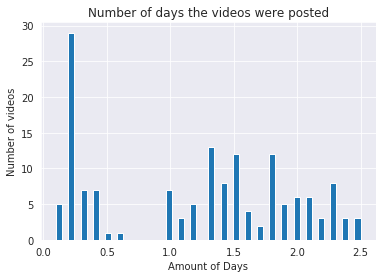

In [238]:
df["petal width (cm)"].hist(bins=50)
plt.title('Number of days the videos were posted')
plt.xlabel('Amount of Days')
plt.ylabel('Number of videos')




/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



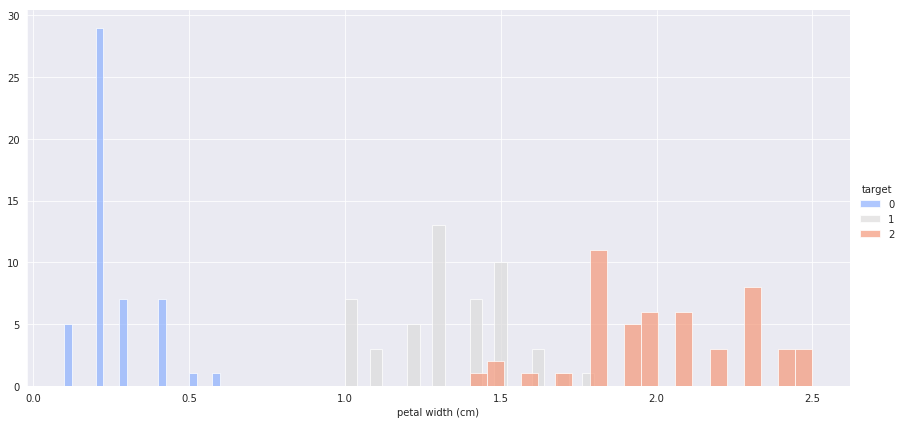

In [239]:
sns.set_style('darkgrid')
g = sns.FacetGrid(df,hue="target",palette='coolwarm',size=6,aspect=2)
g = g.map(plt.hist,"petal width (cm)",bins=20,alpha=0.7).add_legend()

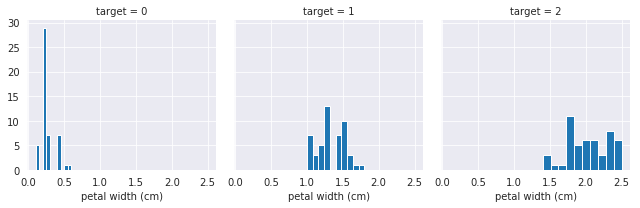

In [240]:
  p = sns.FacetGrid(df, col="target")
  p= p.map(plt.hist, "petal width (cm)")
  plt.show()


In [0]:
 p= map(plt.hist, "petal width (cm)")
 plt.show()

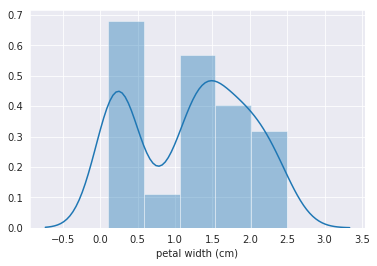

In [242]:
sns.distplot(df["petal width (cm)"])
plt.show()


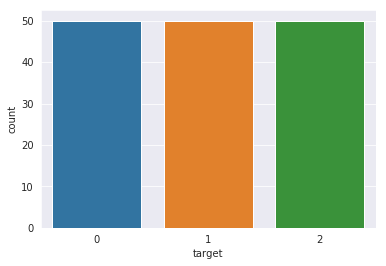

In [243]:
sns.countplot('target', data=df)
plt.show()

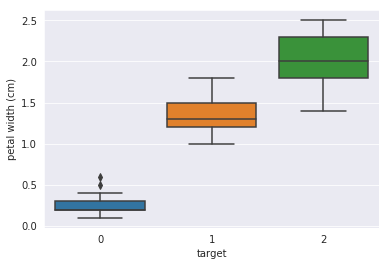

In [244]:
sns.boxplot(x='target', y='petal width (cm)', data=df)
plt.show()

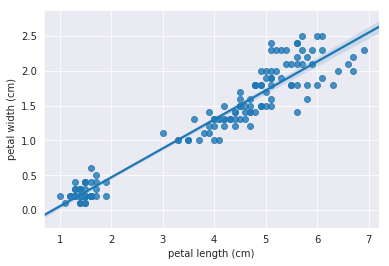

In [245]:
sns.regplot(x='petal length (cm)', y='petal width (cm)', data=df,fit_reg=True)
plt.show()

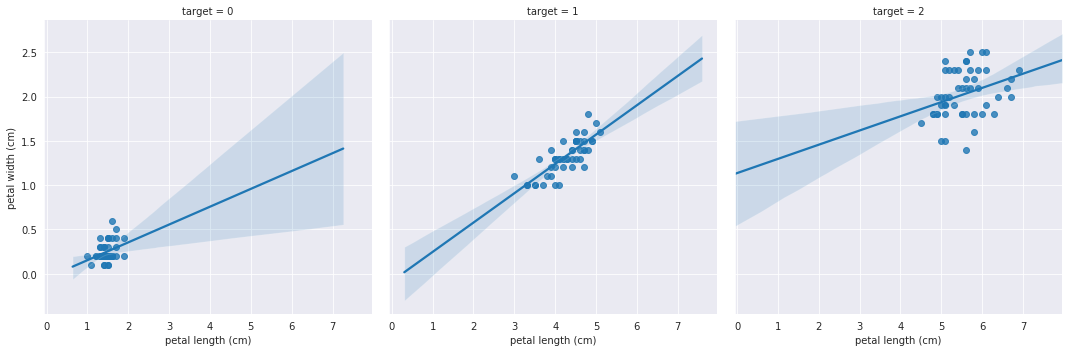

In [246]:
sns.lmplot(x='petal length (cm)', y='petal width (cm)', data=df,fit_reg=True,col='target')
plt.show()

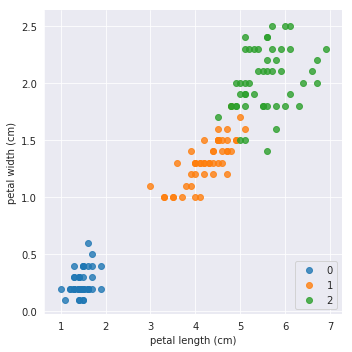

In [247]:
#Map a color per group

# Use the 'hue' argument to provide a factor variable
sns.lmplot( x='petal length (cm)', y='petal width (cm)', data=df, fit_reg=False, hue='target', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 


In [251]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


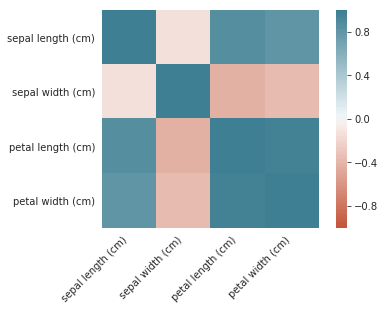

In [256]:
cov = df.cov()

corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

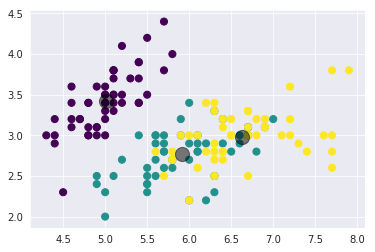

In [281]:
plt.scatter(x=df['sepal length (cm)'], y=df['sepal width (cm)'], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


Model Evaluation

In [0]:
#Print Confusion Matrix
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

plt.figure()
cm = confusion_matrix(test_Y, preds_y) 
labels = ['Stable and Popular', 'Hot', 'Everything else']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [0]:
print("Recall: {0}".format(round(recall_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
print("Precision: {0}".format(round(precision_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
print("f1 score: {0}".format(round(f1_score(test_Y, preds_y, labels=[0, 1, 2], average='macro'),4)))
